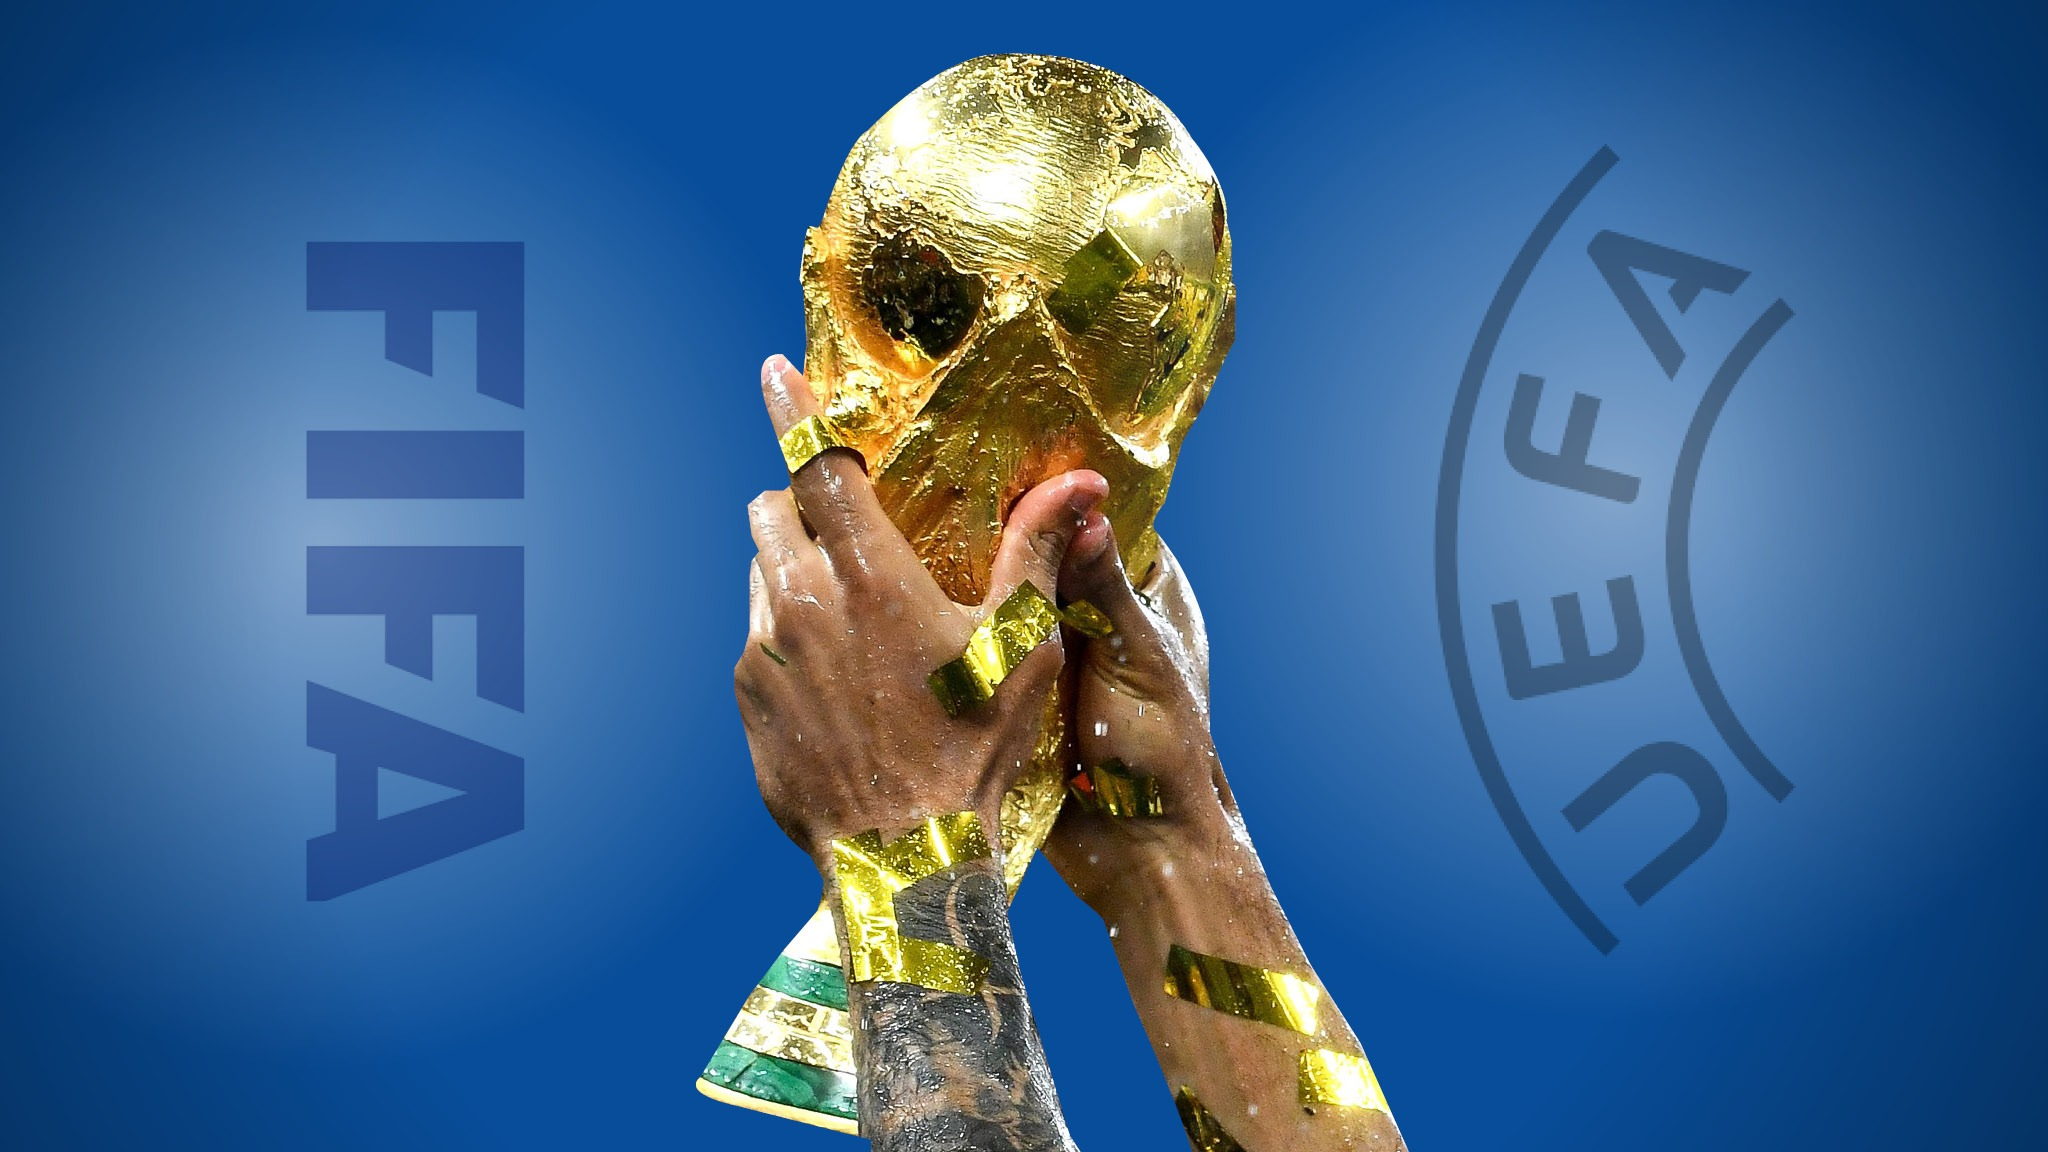

# LETS PLAY FIFA !!!

AI_1 Project 29/10/2021

**Team: Akshay Ranjith,	Krishn Katyal,	Mayank Gupta, Prerna Mahajan,	Vishal Balaji**



#Importing necessary libiraries(For part -A, Project)

In [ ]:
# Import required libraries
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import pickle
from IPython.display import display, HTML
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.utils import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import the necessary libraries
import tensorflow as tf
import numpy as np
!pip install shap
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

tf.keras.backend.clear_session()  # For easy reset of notebook state.



%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
plt.style.use('seaborn-white')
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  cross_val_score
# These are custom functions made to help you visualise your results
# from helper import plot_functions
# from helper import plot_coefficients
#For feature importance check
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Ignoring all warnings in the notebook
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = os.getcwd()
path

'/content'

# Loading Data

Preprocessing-PartA

In [4]:
##Loading FIFA-19 and FIFA-20 Dataset

df_19 = pd.read_csv('/content/drive/MyDrive/ai-1/players_19.csv')
df_20 = pd.read_csv('/content/drive/MyDrive/ai-1/players_20.csv')
# df_19 = pd.read_csv('/content/drive/MyDrive/AI-1(Univ)/players_19.csv')
# df_20 = pd.read_csv('/content/drive/MyDrive/AI-1(Univ)/players_20.csv')
#Checking Data set of Fifa 2019 and Fifa 2020
df_19.head(3)
df_20.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


In [ ]:
#checking for Null values, Unique values, Cardanality in the data set 2019
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def tbl_report(tbl, cols=None, card=10):
    print("Table Shape", tbl.shape)
    dtypes = tbl.dtypes
    nulls = []
    uniques = []
    numuniques = []
    vcs = []
    for col in dtypes.index:
        n = tbl[col].isnull().sum()
        nulls.append(n)
        strdtcol = str(dtypes[col])
        #if strdtcol == 'object' or strdtcol[0:3] == 'int' or strdtcol[0:3] == 'int':
        #print(strdtcol)
        uniqs = tbl[col].unique()
        uniquenums = uniqs.shape[0]
        if uniquenums < card: # low cardinality
            valcounts = pd.value_counts(tbl[col], dropna=False)
            vc = "\n".join(["{}:{}".format(k,v) for k, v in valcounts.items()])
        else:
            vc='HC' # high cardinality
        uniques.append(uniqs)
        numuniques.append(uniquenums)
        vcs.append(vc)
    nullseries = pd.Series(nulls, index=dtypes.index)
    uniqueseries = pd.Series(uniques, index=dtypes.index)
    numuniqueseries = pd.Series(numuniques, index=dtypes.index)
    vcseries = pd.Series(vcs, index=dtypes.index)
    df = pd.concat([dtypes, nullseries, uniqueseries, numuniqueseries, vcseries], axis=1)
    df.columns = ['dtype', 'nulls', 'uniques', 'num_uniques', 'value_counts']
    if cols:
        return df[cols]
    return df

In [ ]:
pretty_print(tbl_report(df_19, cols=['dtype', 'nulls', 'num_uniques', 'value_counts'], card = 11))

Table Shape (17770, 104)


,dtype,nulls,num_uniques,value_counts
sofifa_id,int64,0,17770,HC
player_url,object,0,17770,HC
short_name,object,0,16811,HC
long_name,object,0,17710,HC
age,int64,0,29,HC
dob,object,0,6093,HC
height_cm,int64,0,51,HC
weight_kg,int64,0,57,HC
nationality,object,0,160,HC
club,object,0,679,HC


In [ ]:
#Dropping the columns as mentioned in the problem statement @Edstem
cols_to_drop = ['player_url','short_name','long_name','dob','potential','real_face','player_tags','loaned_from','nation_position','nation_jersey_number','team_jersey_number']
df_19 = df_19.drop(cols_to_drop,axis=1)
df_19.shape

(17770, 93)

# EDA

### Players from Different Countries


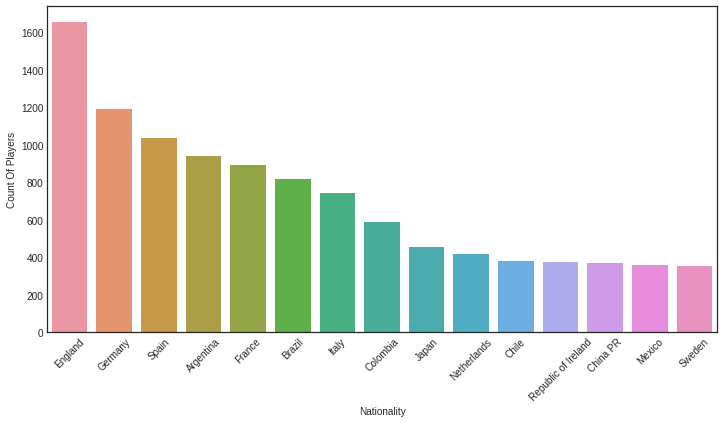

In [154]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x = df_19.nationality.value_counts()[:15].index,
    y = df_19.nationality.value_counts()[:15],
)
plt.xlabel("Nationality")
plt.ylabel("Count Of Players")
plt.xticks(rotation=45)
plt.show()

### Analysis of Player Salary

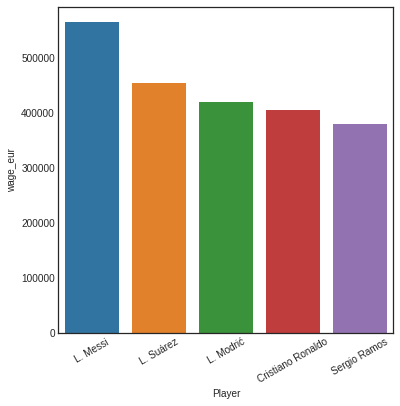

In [155]:
player_salary = df_19[['short_name','wage_eur']]
player_salary = player_salary.sort_values(by=['wage_eur'],ascending=False)
plt.figure(figsize=(6,6))
sns.barplot(player_salary['short_name'][0:5],player_salary['wage_eur'][0:5])
plt.xticks(rotation=30)
plt.xlabel('Player')
plt.ylabel('wage_eur');

### Top 20 players from Fifa 19

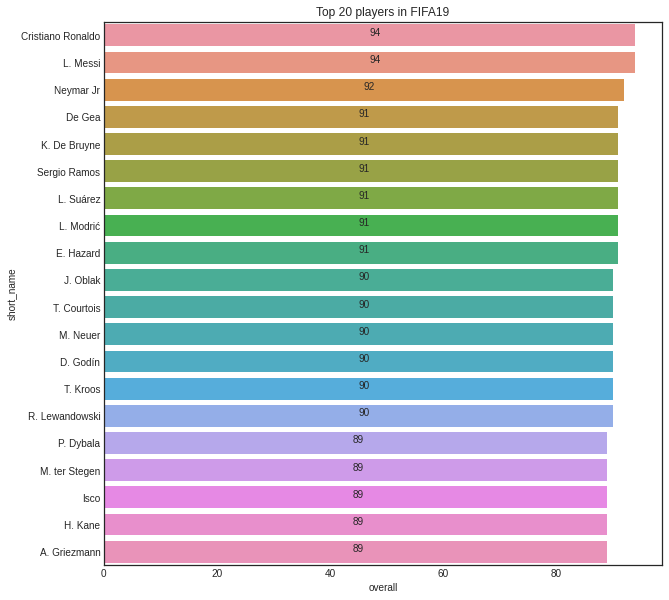

In [156]:
plt.figure(figsize=(10,10))
top_players = df_19[['short_name', 'overall']][:20]
plt.title("Top 20 players in FIFA19")
sns.barplot(y = top_players.short_name, x = top_players.overall)
for index, value in enumerate(top_players.overall):
    plt.text(value//2, index, str(value))


Top Youngest players (Age<20)

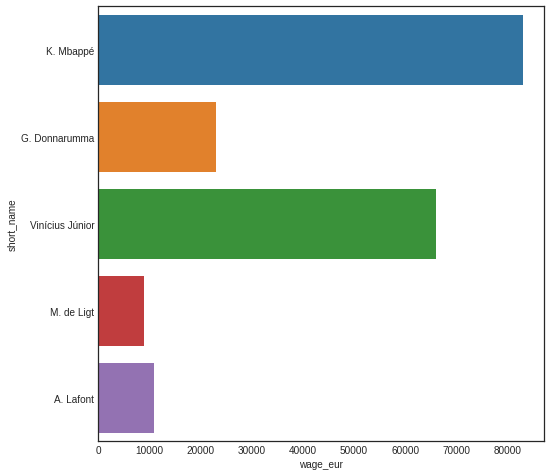

In [158]:
data_young = df_19[df_19['age']<=20].sort_values(by=['potential','value_eur'],ascending=[False,True])[0:5]
plt.figure(figsize=(8,8))
sns.barplot(y='short_name',x='wage_eur',data=data_young);

### Top 20 clubs in Fifa 19

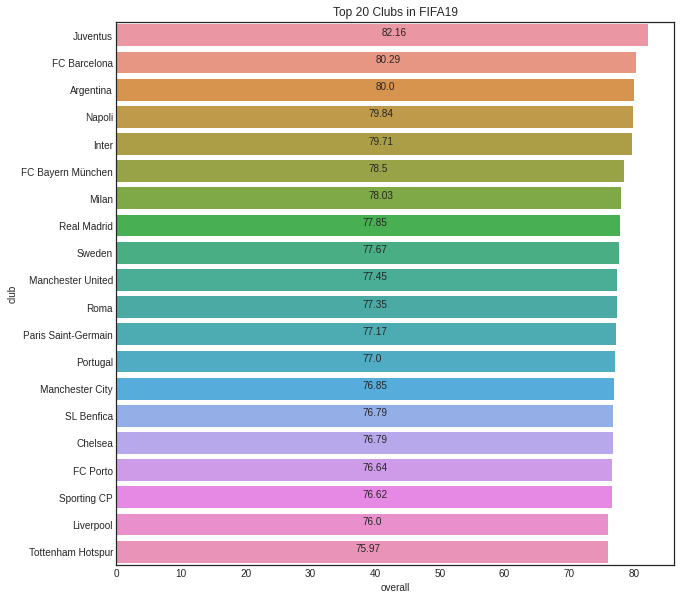

In [159]:
plt.figure(figsize=(10,10))
top_clubs = df_19.groupby(['club']).overall.mean().sort_values(ascending  = False)[:20]
plt.title("Top 20 Clubs in FIFA19")
sns.barplot(y = top_clubs.index, x = top_clubs)
for index, value in enumerate(top_clubs):
    plt.text(value//2, index, str(round(value,2)))

### Corelation btw player overall score and attributes

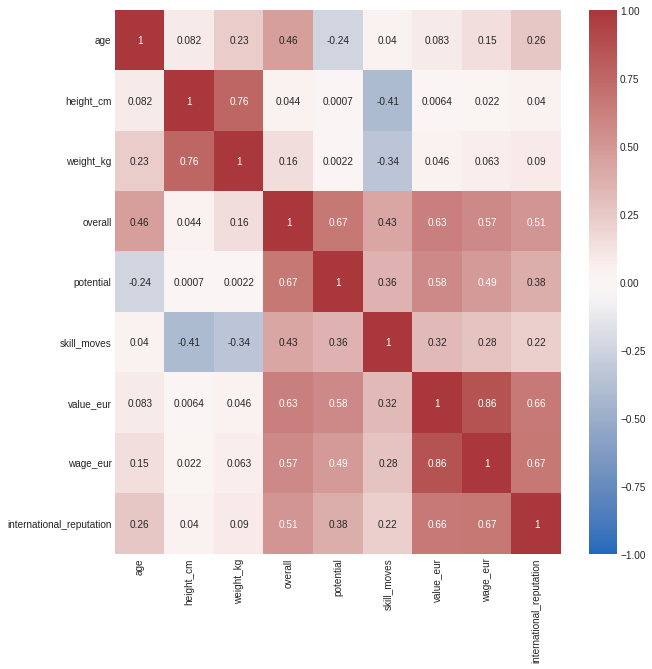

In [160]:
plt.figure(figsize=(10,10))
sns.heatmap(data = df_19[['age','height_cm','weight_kg','overall','potential','skill_moves',
                        'value_eur','wage_eur','international_reputation']].corr(), 
            annot = True,  cmap = "vlag", vmin = -1, vmax = 1, center = 0)

### Players with Left and Right foot preference

Text(1, 6819, '13639')

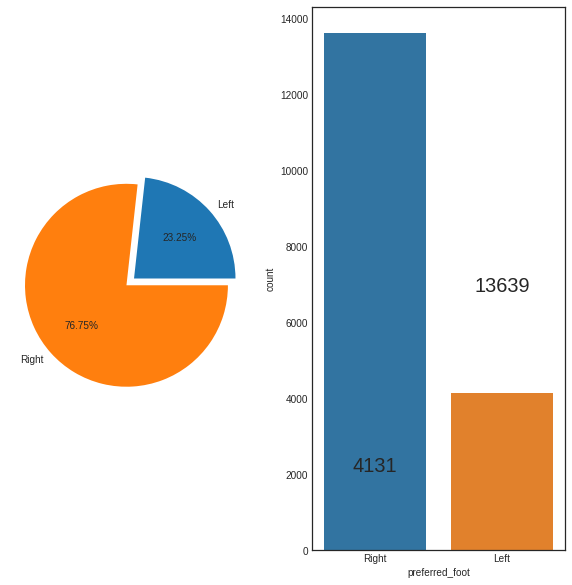

In [161]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.pie(x = df_19.groupby(['preferred_foot']).preferred_foot.count().to_list(),
        labels = ["Left", "Right"], autopct='%1.2f%%', explode = (0, 0.1))

plt.subplot(122)
sns.countplot(data = df_19, x = 'preferred_foot')
right, left = df_19.preferred_foot.value_counts()
total = right + left
plt.text(0, left//2, left, fontsize = 20,  horizontalalignment='center')
plt.text(1, right//2, right, fontsize = 20, horizontalalignment='center')

### Distribution of Age

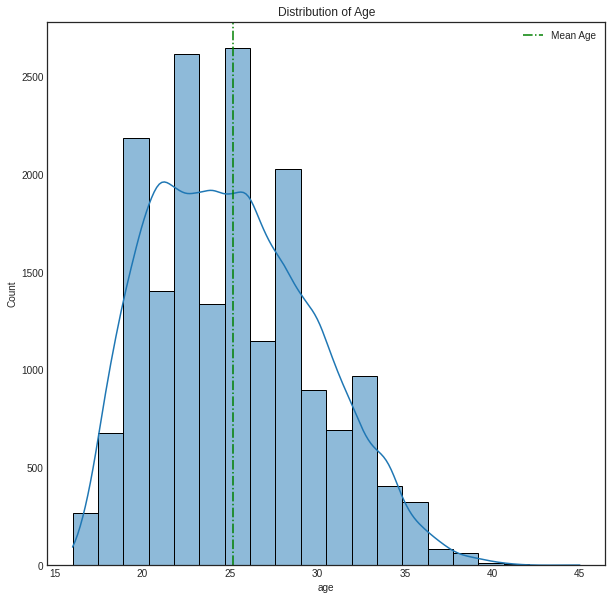

In [162]:
plt.figure(figsize=(10,10))
sns.histplot(x= df_19.age, kde=True, bins=20)
plt.axvline(x= df_19.age.mean(),c='green',ls='-.',label='Mean Age')
plt.legend()
plt.title('Distribution of Age');

### Distribution of Weight & Height

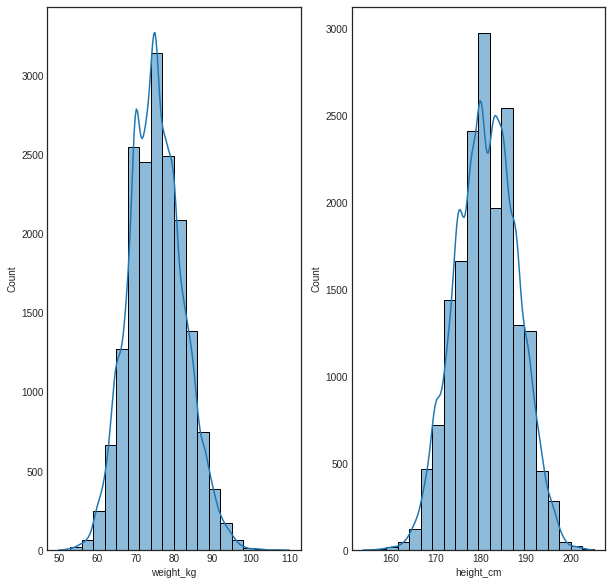

In [165]:
plt.figure(figsize=(10,10))
plt.subplot(121)
sns.histplot(x= df_19.weight_kg, kde=True, bins=20)

plt.subplot(122)
sns.histplot(x= df_19.height_cm, kde=True, bins=20);

### Players from different Countries

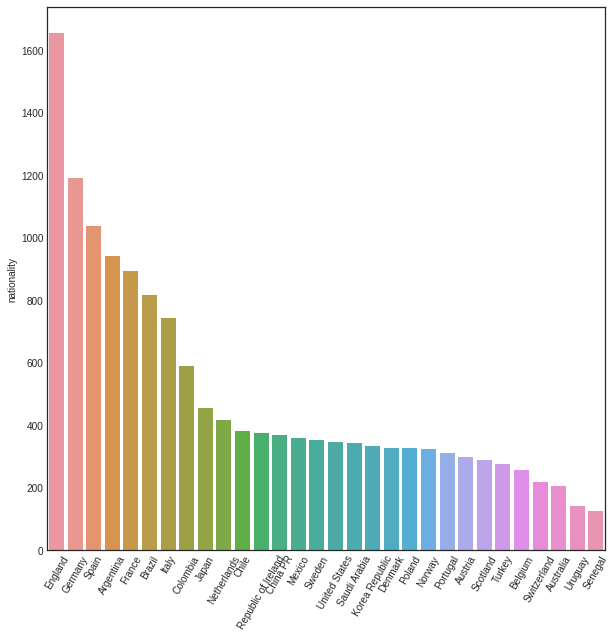

In [166]:
plt.figure(figsize=(10,10))
country_count = df_19.nationality.value_counts()[:30]
plt.xticks(rotation = 60)
sns.barplot(x = country_count.index, y = country_count);

### Relationship btw Age and Wage

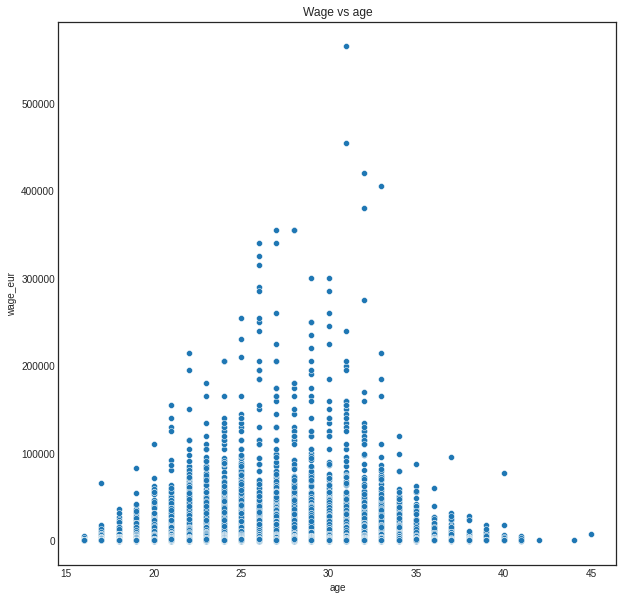

In [168]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_19, x="age", y="wage_eur").set_title("Wage vs age");

# Data set columns Transformations


In [9]:
#Adding and subtracting the numerics in the columns of the data set

def add_subtract(x):
    if '-' in x:
        return(int(x.split('-')[0]) - int(x.split('-')[1]))
    if '+' in x:
        return(int(x.split('+')[0]) + int(x.split('+')[1]))
    else:
        return(int(x))

In [10]:
change_cols = df_19.columns[list(df_19.columns).index('attacking_crossing'):]
for i in change_cols:
    df_19[i] = df_19[i].fillna('0').apply(lambda x: add_subtract(x))

### Slecting features

For modelling we are only taking the features which represents the player's skill. Even when we added more columns like jersey number, clubs and thier joined rate, this didnt improved the model significantly.

In [5]:
#Columns name/features considered for training
player_skills_1= ['pace', 'shooting','passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning']


In [6]:
#Filling missing values in player_skills_1 as '0'
df_19[player_skills_1] = df_19[player_skills_1].fillna(0)

In [11]:
#Player_skills_2 are the columns, on which the column transformation is done,i.e. addition and subtrtaction of the numerics
player_skills_2 = list(change_cols) # convering index object into list



In [12]:
#Adding the response variable column named "overall"
#player_skills_1 and player_skills_2 contains all the numerical columns that we have considered for training.
df_main = df_19[player_skills_1+ player_skills_2+['overall']] 

In [ ]:
#Plotting the table with all the selected features, and retriving the report, tbl_report, function defined in the above cells
tbl_report(df_main)
#Total 72 features, considered for training and "overall", being the response

Table Shape (17770, 73)


,dtype,nulls,uniques,num_uniques,value_counts
pace,float64,0,"[90.0, 88.0, 92.0, 0.0, 77.0, 75.0, 80.0, 76.0...",72,HC
shooting,float64,0,"[93.0, 91.0, 84.0, 0.0, 86.0, 63.0, 90.0, 76.0...",79,HC
passing,float64,0,"[81.0, 88.0, 83.0, 0.0, 92.0, 71.0, 79.0, 90.0...",69,HC
dribbling,float64,0,"[89.0, 96.0, 95.0, 0.0, 87.0, 71.0, 88.0, 91.0...",71,HC
defending,float64,0,"[35.0, 32.0, 0.0, 60.0, 91.0, 52.0, 70.0, 89.0...",78,HC
...,...,...,...,...,...
lcb,int64,0,"[56, 49, 50, 0, 69, 90, 68, 74, 52, 75, 60, 48...",64,HC
cb,int64,0,"[56, 49, 50, 0, 69, 90, 68, 74, 52, 75, 60, 48...",64,HC
rcb,int64,0,"[56, 49, 50, 0, 69, 90, 68, 74, 52, 75, 60, 48...",64,HC
rb,int64,0,"[64, 60, 63, 0, 76, 87, 71, 82, 80, 61, 59, 72...",58,HC


We are reducing the memory usage by using the below function.

Source : kaggale Ashare Energy prediction competition.

In [ ]:
def memory_reduction(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2   # current memory usage of the dataframe passed
    for column in df.columns:
        column_type = df[column].dtypes  # data type of each cloumn
        if column_type in numerics:
            c_min = df[column].min()  #minimum value in column
            c_max = df[column].max()#maximum value in column
            if str(column_type)[:3] == 'int': # if the column is int object we try to change that into int8 or int16
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max: # We are checking if the max and min values in this column can be represented by int8 (if it comes in the range of values of int8, we change into int8)
                    df[column] = df[column].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[column] = df[column].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('size of the memory is reduced to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
#Memory reduction
df_main = memory_reduction(df_main)

size of the memory is reduced to  1.44 Mb (85.4% reduction)


In [ ]:
# Checking shape of df_main 
df_main.shape

(17770, 73)

## Feature selection using Collinearity

Out of the total 73 columns that is selected for modelling, there are few columns with high collinearity. We can drop one of the columns with higer than 90% correlation.

In [13]:
cor_matrix = df_main.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

In [14]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print('Columns to be dropped: /n')
print(to_drop)

Columns to be dropped: /n
['dribbling', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_finishing', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_ball_control', 'movement_sprint_speed', 'power_shot_power', 'power_long_shots', 'mentality_interceptions', 'mentality_positioning', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']


*Note : Since we have filled 0 for all the missing values for the columns which has goal keeper attributes, which resulted with a high percentage of zeros. This caused high corelation btw the goal keeper attributes, where more than 20-40% are zeroes. So will add these goal keeper attributes to the final features.*

In [15]:
gk_skills = ['gk_diving' ,'gk_handling' ,'gk_kicking' ,'gk_reflexes' ,'gk_speed' ,'gk_positioning']

In [16]:
final_to_drop = [x for x in to_drop if x not in gk_skills]

In [17]:
len(final_to_drop)# We will drop 45 of the columns with high-collinearity, this also helps in computation by reducing RAM requirements

45

In [18]:
df_main.drop(final_to_drop,axis=1,inplace=True)

In [19]:
#Final shape of the Design Matrix(df_main)
df_main.shape

(17770, 28)

In [20]:
columns_used = list(df_main.columns)
columns_used

['pace',
 'shooting',
 'passing',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_heading_accuracy',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'movement_acceleration',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'mentality_aggression',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'overall']

##### Normalization of variables

In [21]:
#Normalizing the data between the scale(0-1), the whole column data
for col in columns_used:
   df_main[col]=(df_main[col]-df_main[col].min())/(df_main[col].max()-df_main[col].min())

In [ ]:
#Printing final design matrix head
df_main.head(3)

,pace,shooting,passing,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_heading_accuracy,skill_curve,skill_fk_accuracy,skill_long_passing,movement_acceleration,movement_agility,movement_reactions,movement_balance,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_vision,mentality_penalties,mentality_composure,overall
0,0.937500,1.000000,0.880371,0.384521,0.887695,0.0,0.0,0.0,0.0,0.0,0.0,0.831579,0.944444,0.842697,0.695238,0.750000,0.912088,0.798165,1.000000,0.701031,0.771429,0.872549,0.782609,0.619048,0.818182,0.864583,0.989247,1.000000
1,0.916504,0.978516,0.956543,0.351562,0.685547,0.0,0.0,0.0,0.0,0.0,0.0,0.757895,0.733333,0.977528,0.866667,0.858696,0.934066,0.834862,0.984848,0.958763,0.514286,0.715686,0.565217,0.440476,0.954545,0.760417,1.000000,1.000000
2,0.958496,0.903320,0.902344,0.351562,0.663086,0.0,0.0,0.0,0.0,0.0,0.0,0.778947,0.644444,0.921348,0.800000,0.760870,0.967033,0.880734,0.969697,0.845361,0.447619,0.803922,0.456522,0.535714,0.875000,0.822917,0.978495,0.957447


##### Distribution of the response variable -"Overall"

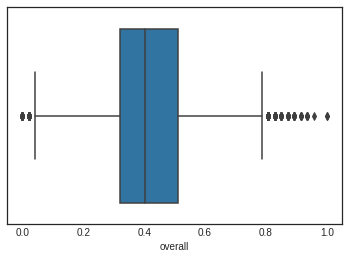

In [ ]:
# Distribution of the response variable -"Overall"
sns.boxplot(data=df_main,x = "overall")

In [ ]:
df_main.corr()

,pace,shooting,passing,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_heading_accuracy,skill_curve,skill_fk_accuracy,skill_long_passing,movement_acceleration,movement_agility,movement_reactions,movement_balance,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_vision,mentality_penalties,mentality_composure,overall
pace,1.000000,0.795983,0.844696,0.555757,0.782052,-0.887443,-0.887363,-0.886815,-0.886834,-0.860081,-0.885191,0.749183,0.608632,0.678564,0.586277,0.572208,0.871217,0.744316,0.143589,0.663757,0.226420,0.732800,-0.019090,0.462463,0.475554,0.644225,0.404304,0.140921
shooting,0.795983,1.000000,0.877009,0.383043,0.707986,-0.773380,-0.773311,-0.772833,-0.772850,-0.749536,-0.771418,0.758175,0.625467,0.830338,0.774161,0.646807,0.645595,0.670851,0.344310,0.562431,0.154406,0.643251,0.063150,0.426608,0.711883,0.873225,0.589999,0.343684
passing,0.844696,0.877009,1.000000,0.682858,0.821927,-0.867474,-0.867396,-0.866860,-0.866879,-0.840728,-0.865273,0.889664,0.673145,0.844308,0.797761,0.854089,0.648593,0.676280,0.374005,0.604478,0.181186,0.753214,0.077285,0.606878,0.721241,0.742105,0.630509,0.372868
defending,0.555757,0.383043,0.682858,1.000000,0.818751,-0.720481,-0.720416,-0.719971,-0.719986,-0.698267,-0.718652,0.538838,0.709397,0.389250,0.389579,0.655180,0.287793,0.247861,0.274330,0.250445,0.298290,0.672585,0.342358,0.793920,0.239573,0.273449,0.428528,0.268934
physic,0.782052,0.707986,0.821927,0.818751,1.000000,-0.905217,-0.905135,-0.904576,-0.904596,-0.877307,-0.902920,0.626650,0.864187,0.561555,0.523798,0.631441,0.490749,0.425344,0.265120,0.338170,0.351011,0.816943,0.464065,0.790225,0.375977,0.575677,0.511345,0.266223
gk_diving,-0.887443,-0.773380,-0.867474,-0.720481,-0.905217,1.000000,0.996994,0.995051,0.998426,0.969743,0.996617,-0.674911,-0.764411,-0.616509,-0.567938,-0.605096,-0.597140,-0.535275,-0.070433,-0.510308,-0.197590,-0.709191,-0.120003,-0.589091,-0.392385,-0.632565,-0.385881,-0.036563
gk_handling,-0.887363,-0.773311,-0.867396,-0.720416,-0.905135,0.996994,1.000000,0.995326,0.996801,0.966582,0.997327,-0.674822,-0.764476,-0.616129,-0.567601,-0.604712,-0.599906,-0.536840,-0.071599,-0.512244,-0.199961,-0.709949,-0.119301,-0.588770,-0.391146,-0.632664,-0.384689,-0.037114
gk_kicking,-0.886815,-0.772833,-0.866860,-0.719971,-0.904576,0.995051,0.995326,1.000000,0.994837,0.966508,0.994616,-0.674040,-0.763780,-0.615529,-0.566968,-0.602751,-0.598957,-0.536769,-0.075556,-0.510912,-0.200933,-0.709375,-0.120280,-0.587973,-0.389230,-0.632206,-0.386846,-0.042347
gk_reflexes,-0.886834,-0.772850,-0.866879,-0.719986,-0.904596,0.998426,0.996801,0.994837,1.000000,0.969628,0.996705,-0.674225,-0.763762,-0.615903,-0.567215,-0.604190,-0.596200,-0.534372,-0.068034,-0.509655,-0.197145,-0.708522,-0.118878,-0.588046,-0.391038,-0.631730,-0.384104,-0.034513
gk_speed,-0.860081,-0.749536,-0.840728,-0.698267,-0.877307,0.969743,0.966582,0.966508,0.969628,1.000000,0.968310,-0.649713,-0.737438,-0.592602,-0.546760,-0.578104,-0.527745,-0.490062,-0.054732,-0.466220,-0.164055,-0.671627,-0.103789,-0.564903,-0.381804,-0.603890,-0.359465,-0.029973


# Performing train_test_split

In [43]:
#Prediction variables
X = df_main.drop(['overall'],axis=1)
#Response variables
y = df_main['overall']

In [44]:
# We divide our data into validation and train sets with 80% training size

X_train, X_val, y_train, y_val = train_test_split(X,y,train_size=.8,random_state=42)



#### Test Set

In [29]:
columns_to_use = list(df_main.columns) + ['club']
print(columns_to_use)

['pace', 'shooting', 'passing', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing', 'attacking_heading_accuracy', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'movement_acceleration', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_jumping', 'power_stamina', 'power_strength', 'mentality_aggression', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'overall', 'club']


In [36]:
#Test data frame from the FIFA 2020 Data set
df_test = df_20[columns_to_use]


In [31]:
#Filling missing values in the data set with 0
df_test = df_test.fillna(0)

In [32]:
clubs = ['FC Barcelona', 'FC Bayern München', 'Real Madrid', 'Paris Saint-Germain', 'Juventus' ,'Manchester City' ,'Liverpool']

In [33]:
df_test_new = pd.DataFrame()

In [34]:
#Running the loop to obtain the data for only the afore mentioned loop
for club in clubs:

  df_new = df_test[df_test['club']==club]
  df_test_new = pd.concat([df_test_new,df_new])


In [37]:
#Normalization of the data(0-1)
for col in columns_used:
     df_test_new[col]=(df_test_new[col]-df_test_new[col].min())/(df_test_new[col].max()-df_test_new[col].min())

In [38]:
#Making the test data, prediction and labeled data
x_test = df_test_new.drop(['overall','club'],axis=1)
y_test = df_test_new['overall']
# x_test, y_test = x_test.astype('float'), y_test.astype('float')

# Baseline Model


In [118]:
# Baseline model, MSE against the average value of the prediction (variable) columns
y_pred_base = [np.mean(y_train)] * len(y_val)


In [121]:
mse_base=mean_squared_error(y_val, y_pred_base)
print(f'The MSE of the base line model is : {mse_base:.4}')

The MSE of the base line model is : 0.02156


# Models 

### Lasso Crossvalidation

In [122]:
# Selecting the degree for polynomial features

degree= 2

# List of hyper-parameter values-alpha 

alphas = [0.0, 1e-05, 0.001, 0.01, 0.1, 1]
# alphas = [0.01]

# Split the data into train and validation sets with 75% for training 
    # and with a random_state=1
X_train, X_val, y_train, y_val = train_test_split(X,y,train_size=.8,random_state=42)
    
# Create 3 lists for training error

training_error, validation_error, cross_validation_error= [],[],[]

# Compute the polynomial features train and validation sets

x_poly_train = PolynomialFeatures(degree).fit_transform(X_train)
x_poly_val= PolynomialFeatures(degree).fit_transform(X_val)

print(x_poly_train)
for i, alpha in enumerate(alphas):
    
    
    # For each i, fit a lasso regression on training set
    
    lasso_reg = Lasso(alpha=alpha,fit_intercept=False)
   
    lasso_reg.fit(x_poly_train,y_train)
    
    # Predict on the validation set 
    
    y_train_pred = lasso_reg.predict(x_poly_train)
    y_val_pred = lasso_reg.predict(x_poly_val)
    
    # Compute the training and validation errors
    
    mse_train = mean_squared_error(y_train_pred, y_train) 
    mse_val = mean_squared_error(y_val_pred, y_val)
    
    # Add that value to the list 
    training_error.append(mse_train)
    validation_error.append(mse_val)
    #Perform k-fold cross validation with k=10,Using sklearn cross_validate() to perform cross validation.
    mse_score = cross_validate(lasso_reg,x_poly_train,y_train,scoring = 'neg_mean_squared_error',cv = 10, return_train_score = True)
    
    cross_validation_error.append(np.mean(np.abs(mse_score['test_score'])))

[[1.         0.67708333 0.48387097 ... 0.20062934 0.22636649 0.25540525]
 [1.         0.79166667 0.62365591 ... 0.34027778 0.38261649 0.43022315]
 [1.         0.73958333 0.6344086  ... 0.40375434 0.34162186 0.28905076]
 ...
 [1.         0.63541667 0.58064516 ... 0.15668403 0.31070789 0.61614059]
 [1.         0.5        0.80645161 ... 0.59418403 0.60506272 0.61614059]
 [1.         0.65625    0.47311828 ... 0.09125434 0.09094982 0.09064632]]


In [95]:
# Finding the best value of hyper parameter, which gives the least k fold MSE

best_parameter = alphas[cross_validation_error.index(min(cross_validation_error))]

print(f'The best hyper parameter value, alpha = {best_parameter}, with least MSE value of = {min(cross_validation_error):.5f}')

The best hyper parameter value, alpha = 0.0, with least MSE value of = 0.00096


In [96]:
lasso_lreg = Lasso(fit_intercept=False, alpha=best_parameter) 
        #Performing cross validation with k-fold=10
cv_results = cross_validate(lasso_lreg,x_poly_train,y_train, scoring='neg_mean_squared_error',cv=10,return_estimator=True)
        # storing coefficients in the coefs_list
coefs_list = cv_results['estimator'][0].coef_

In [97]:
print(f'The minimum cross validate error uisng best alpha is {(np.abs(cv_results["test_score"])).mean()}')

The minimum cross validate error uisng best alpha is 0.0009608910770683512


**Validation error uisng Lasso is 0.00096**

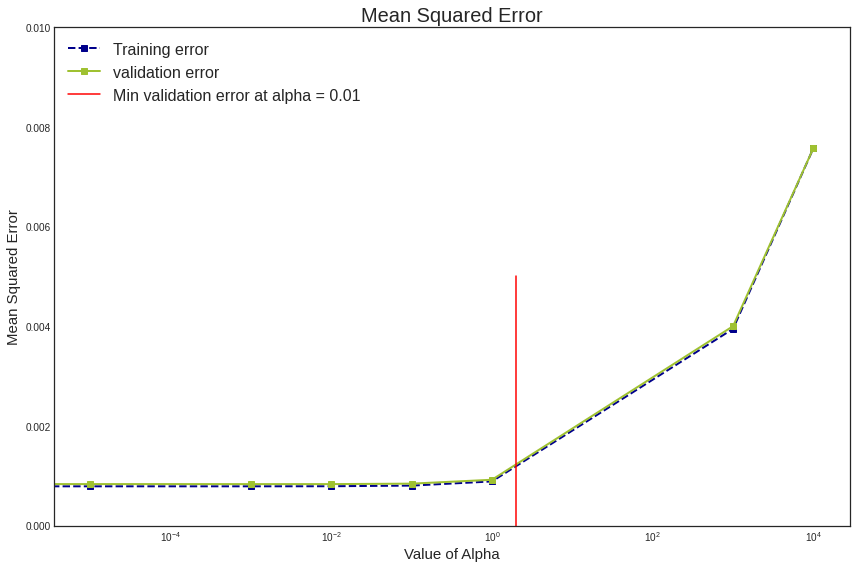

In [93]:
# Now make the MSE polots
# Plot the errors as a function of increasing d value to visualise the training and validation errors

fig, ax = plt.subplots(figsize = (12,8))

# Plot the training errors for each alpha value

ax.plot(alphas,training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)

# Plot the validation errors for each alpha value

ax.plot(alphas,validation_error,'s-', label = 'validation error',color ='#9FC131FF',linewidth=2 )

# Draw a vertical line at the best parameter

ax.axvline(2, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

ax.set_xlabel('Value of Alpha',fontsize=15)
ax.set_ylabel('Mean Squared Error',fontsize=15)
ax.set_ylim([0,0.010])
ax.legend(loc = 'upper left',fontsize=16)
ax.set_title('Mean Squared Error',fontsize=20)
ax.set_xscale('log')
plt.tight_layout()

##### Prediction on the test set

In [55]:
x_poly_test = PolynomialFeatures(degree).fit_transform(x_test)

In [57]:
y_pred_test =lasso_lreg.predict(x_poly_test)

In [58]:
mse = mean_squared_error(y_test,y_pred_test)
mse

0.005065444994275106

In [59]:
print(f'The Test set MSE by using the Lasso model is {mse:.4f}')

The Test set MSE by using the Lasso model is 0.0051


**The test set MSE by using the Lasso model is 0.0051**

### Ridge Cross Validation

In [88]:
# Selecting the degree for polynomial features

degree= 2

# List of hyper-parameter values-alpha 

alphas = [0.0, 1e-05, 0.001, 0.01, 0.1, 1, 1000, 10000.0]
# alphas = [0.01]


# Split the data into train and validation sets with 75% for training 
    # and with a random_state=1
X_train, X_val, y_train, y_val = train_test_split(X,y,train_size=.8,random_state=42)
    
# Create 3 lists for training error

training_error, validation_error, cross_validation_error= [],[],[]

# Compute the polynomial features train and validation sets

x_poly_train = PolynomialFeatures(degree).fit_transform(X_train)
x_poly_val= PolynomialFeatures(degree).fit_transform(X_val)

for i, alpha in enumerate(alphas):
    
    
    # For each i, fit a lasso regression on training set
    
    ridge = Ridge(alpha=alpha,fit_intercept=False)
   
    ridge.fit(x_poly_train,y_train)
    
    # Predict on the validation set 
    
    y_train_pred = ridge.predict(x_poly_train)
    y_val_pred = ridge.predict(x_poly_val)
    
    # Compute the training and validation errors
    
    mse_train = mean_squared_error(y_train_pred, y_train) 
    mse_val = mean_squared_error(y_val_pred, y_val)
    
    # Add that value to the list 
    training_error.append(mse_train)
    validation_error.append(mse_val)
    #Perform k-fold cross validation with k=10,Using sklearn cross_validate() to perform cross validation.
    mse_score = cross_validate(ridge,x_poly_train,y_train,scoring = 'neg_mean_squared_error',cv = 10, return_train_score = True)
    
    cross_validation_error.append(np.mean(np.abs(mse_score['test_score'])))

In [89]:
# Finding the best value of hyper parameter, which gives the least k fold MSE

best_parameter = alphas[cross_validation_error.index(min(cross_validation_error))]

print(f'The best hyper parameter value, alpha = {best_parameter}, with least MSE value of = {min(cross_validation_error):.4f}')

The best hyper parameter value, alpha = 0.01, with least MSE value of = 0.0008


In [90]:
ridge = Ridge(fit_intercept=False, alpha=best_parameter) 
        #Performing cross validation with k-fold=10
cv_results = cross_validate(ridge,x_poly_train,y_train, scoring='neg_mean_squared_error',cv=10,return_estimator=True)
        # storing coefficients in the coefs_list
coefs_list = cv_results['estimator'][0].coef_

In [98]:
print(f'The mean cross validation error uisng best alpha is {(np.abs(cv_results["test_score"])).mean():.4f}')

The mean cross validation error uisng best alpha is 0.0010


**The validation error using Ridge model is 0.0008**

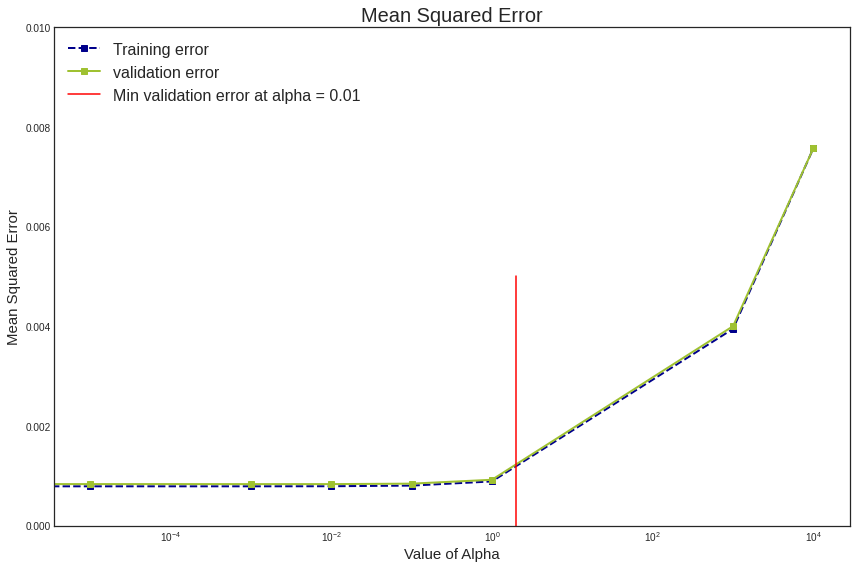

In [92]:
# Now make the MSE polots
# Plot the errors as a function of increasing d value to visualise the training and validation errors

fig, ax = plt.subplots(figsize = (12,8))

# Plot the training errors for each alpha value

ax.plot(alphas,training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)

# Plot the validation errors for each alpha value

ax.plot(alphas,validation_error,'s-', label = 'validation error',color ='#9FC131FF',linewidth=2 )

# Draw a vertical line at the best parameter

ax.axvline(2, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

ax.set_xlabel('Value of Alpha',fontsize=15)
ax.set_ylabel('Mean Squared Error',fontsize=15)
ax.set_ylim([0,0.010])
ax.legend(loc = 'upper left',fontsize=16)
ax.set_title('Mean Squared Error',fontsize=20)
ax.set_xscale('log')
plt.tight_layout()

#### Prediction on test data

In [66]:
x_poly_test = PolynomialFeatures(degree).fit_transform(x_test)

In [70]:
x_poly_test.shape, x_poly_train.shape

((221, 406), (14216, 406))

In [ ]:
# ridge = Ridge(alpha=best_parameter,fit_intercept=False)

# ridge.fit(x_poly_train,y_train)

In [71]:
y_pred_test =ridge.predict(x_poly_test)

In [72]:
mse = mean_squared_error(y_test,y_pred_test)
mse

0.004200341645938579

In [73]:
print(f'The Test set MSE by using the Lasso model is {mse:.4f}')

The Test set MSE by using the Lasso model is 0.0042


**The test set MSE by using the Ridge model is 0.0042**

##Cross Validation on Knn


In [74]:
# Choosing k range from 1 to 100
k_value_min = 1
k_value_max = 100

# Create a list of integer k values between k_value_min and 
# k_value_max using linspace
k_list = np.linspace(k_value_min,k_value_max,num=100,dtype=int)
# Create a dictionary to store the k value against MSE fit {k: MSE@k} 
knn_dict = {}
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
# Loop over all k values
for k_value in k_list:   
    
    # Create a KNN Regression model for the current k
    model = KNeighborsRegressor(n_neighbors=int(k_value))

    # We divide our data into test and train sets with 80% training size

    X_train, X_val, y_train, y_val = train_test_split(X,y,train_size=.8,random_state=42)
    
    # Fit the model on the train data
    model.fit(X_train,y_train)
    
    # Use the trained model to predict on the test data
    y_val_pred = model.predict(X_val)
    
    # Calculate the MSE of the test data predictions
    MSE = mean_squared_error(y_val,y_val_pred)

    # Store the MSE values of each k value in the dictionary
    knn_dict[k_value] = MSE
    
    

dict_values([0.0036407819548259245, 0.0026224762718025938, 0.0022743370324109368, 0.002131960099281779, 0.001995530129085164, 0.0019314520439949155, 0.0019149363009055163, 0.0019067079716604172, 0.0018871193751008332, 0.0018789774679885557, 0.0018888849352101406, 0.0018924962842361687, 0.0018863720089402364, 0.0018903079336546039, 0.001898997402581375, 0.0019173602689272129, 0.0019199787843603982, 0.0019282833748693173, 0.0019308030214605122, 0.0019318721717799978, 0.001941293267264596, 0.0019563767298360077, 0.001959244905716512, 0.001972218485865973, 0.001983173659299846, 0.001987936482452259, 0.001998917919499818, 0.0020063901621975642, 0.0020137991360622077, 0.0020228710574683576, 0.0020295493664381262, 0.0020342582726350584, 0.0020380082888705364, 0.0020529543619354543, 0.002063157726617229, 0.0020679530812284823, 0.002074117625391641, 0.002078372009900199, 0.0020805947843944173, 0.0020883240225883113, 0.002096209743922255, 0.0021033847255560235, 0.0021115429076919287, 0.002118713

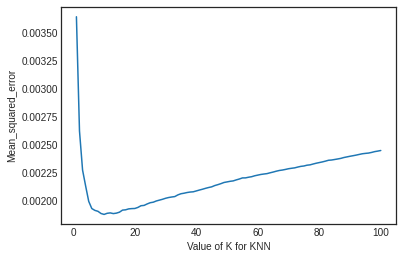

In [77]:
print(knn_dict.values())
print(k_list)
# plot to see clearly
plt.plot(k_list, list(knn_dict.values()))
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean_squared_error')
plt.show()

In [78]:
my_knn_list_mse=list(knn_dict.values())
min_knn_mse=min(my_knn_list_mse)
print(min_knn_mse)
index_min = np.argmin(my_knn_list_mse)
print(index_min)
check=my_knn_list_mse[index_min]
print(check)
k=index_min+1
print(f'k with least mse: {index_min+1} ')

0.0018789774679885557
9
0.0018789774679885557
k with least mse: 10 


In [79]:
#Cross validation(10fold) with the best k value of Knn model

knn = KNeighborsRegressor(n_neighbors=int(k))
scores =  cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
score=np.mean(np.abs(scores))
print(f'Mse using the best {k} for Knn_model is {score:.4f}')

Mse using the best 10 for Knn_model is 0.0049


**Validation MSE using the best K(10) is 0.0049**

#### Prediction on test data

In [ ]:
# knn = KNeighborsRegressor(n_neighbors=int(k))
# knn.fit(X_train,y_train)

In [83]:
y_pred_test =knn.predict(x_test)

In [84]:
mse = mean_squared_error(y_test,y_pred_test)

0.00394600499548662

In [85]:
print(f'Test Mse using KNN model is {mse:.5}')

Test Mse using KNN model is 0.0042003


**Test Mse using KNN model is 0.0042003**

## Neural Network


In [132]:
##Number of features for the Nueral Network
df_main.shape[1]


28

In [133]:
# Building  MLP, using the keras library

nn_model = tf.keras.models.Sequential(name='MLP') # MLP stands for Multi layer perceptron

# Initializing the parameters

n_hidden = 54
n_input = df_main.shape[1]-1
n_output = 1  

In [134]:
# we use the model we created above using tf.keras.model.Sequential
nn_model.add((tf.keras.layers.Dense(n_hidden,input_dim= n_input, activation='relu',kernel_initializer='he_normal', name='hidden_1')))
nn_model.add((tf.keras.layers.Dense(108, activation='relu',kernel_initializer='he_normal', name='hidden_2')))
nn_model.add((tf.keras.layers.Dense(216, activation='relu',kernel_initializer='he_normal', name='hidden_3')))
nn_model.add((tf.keras.layers.Dense(108, activation='relu',kernel_initializer='he_normal', name='hidden_4')))
nn_model.add((tf.keras.layers.Dense(54, activation='relu',kernel_initializer='he_normal', name='hidden_5')))
nn_model.add(tf.keras.layers.Dense(n_output, activation='linear',name='output'))

In [135]:
#Compiling the model
nn_model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mae"])

In [136]:
nn_model.summary()

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 54)                1512      
_________________________________________________________________
hidden_2 (Dense)             (None, 108)               5940      
_________________________________________________________________
hidden_3 (Dense)             (None, 216)               23544     
_________________________________________________________________
hidden_4 (Dense)             (None, 108)               23436     
_________________________________________________________________
hidden_5 (Dense)             (None, 54)                5886      
_________________________________________________________________
output (Dense)               (None, 1)                 55        
Total params: 60,373
Trainable params: 60,373
Non-trainable params: 0
___________________________________________________________

In [137]:
# We fit the model, and save it to a variable 'history' that can be accessed later to analyze the training profile
# We also set validation_split=0.2 for 20% of training data to be used for validation
# verbose=0 means you will not see the output after every epoch. Set verbose=1 to see it
X = df_main.drop(['overall'],axis=1).values
print(X)
y = df_main['overall'].values
print(y)
#Using Callback in order to keep the check on the validation patience
X, y = X.astype('float'), y.astype('float')
callback= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=8,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

history = nn_model.fit(X, y, epochs = 100, validation_split=0.2, batch_size = 32, verbose=1,callbacks=[callback])

[[0.9375     1.         0.88043478 ... 0.81818182 0.86458333 0.98924731]
 [0.91666667 0.97849462 0.95652174 ... 0.95454545 0.76041667 1.        ]
 [0.95833333 0.90322581 0.90217391 ... 0.875      0.82291667 0.97849462]
 ...
 [0.84375    0.37634409 0.51086957 ... 0.34090909 0.35416667 0.38709677]
 [0.65625    0.4516129  0.41304348 ... 0.31818182 0.46875    0.47311828]
 [0.58333333 0.38709677 0.5        ... 0.44318182 0.39583333 0.43010753]]
[1.         1.         0.95744681 ... 0.         0.         0.        ]
Epoch 1/100
445/445 [==============================] - 5s 4ms/step - loss: 0.0050 - mae: 0.0510 - val_loss: 0.0128 - val_mae: 0.1026
Epoch 2/100
445/445 [==============================] - 2s 4ms/step - loss: 0.0022 - mae: 0.0368 - val_loss: 0.0051 - val_mae: 0.0590
Epoch 3/100
445/445 [==============================] - 2s 4ms/step - loss: 0.0015 - mae: 0.0306 - val_loss: 0.0052 - val_mae: 0.0622
Epoch 4/100
445/445 [==============================] - 2s 4ms/step - loss: 0.0013 - m

Text(0.5, 0.98, 'MLP Training')

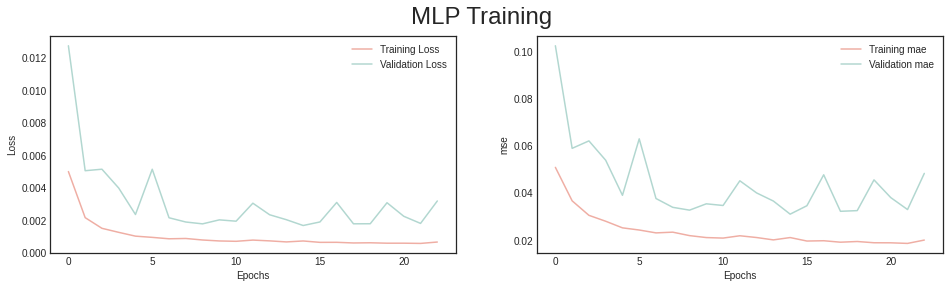

In [138]:
#Plotting the loss=MSE and Metric MAE plot
fig, ax = plt.subplots(1,2,figsize = (16,4))
ax[0].plot(history.history['loss'],color='#EFAEA4',label = 'Training Loss')
ax[0].plot(history.history['val_loss'],color='#B2D7D0',label = 'Validation Loss')
ax[1].plot(history.history['mae'],color='#EFAEA4',label = 'Training mae')
ax[1].plot(history.history['val_mae'],color='#B2D7D0',label = 'Validation mae')
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs');
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('mse');
fig.suptitle('MLP Training', fontsize = 24)

# Prediction on 2020 Fifa

In [139]:
columns_to_use = list(df_main.columns) + ['club']
print(columns_to_use)

['pace', 'shooting', 'passing', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing', 'attacking_heading_accuracy', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'movement_acceleration', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_jumping', 'power_stamina', 'power_strength', 'mentality_aggression', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'overall', 'club']


In [140]:
#Test data frame from the FIFA 2020 Data set
df_test = df_20[columns_to_use]
df_test.tail(3)

,pace,shooting,passing,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_heading_accuracy,skill_curve,skill_fk_accuracy,skill_long_passing,movement_acceleration,movement_agility,movement_reactions,movement_balance,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_vision,mentality_penalties,mentality_composure,overall,club
18275,54.0,35.0,44.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,32,49,32,32,55,55,52,52,57,60,50,51,50,38,36,39,48,Hebei China Fortune FC
18276,59.0,35.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,39,47,37,39,48,55,55,54,59,61,42,55,57,48,36,40,48,Shanghai Greenland Shenhua FC
18277,60.0,32.0,51.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,44,48,34,35,52,54,52,49,71,64,40,61,54,52,38,42,48,Hebei China Fortune FC


In [141]:
#Filling missing values in the data set with 0
df_test = df_test.fillna(0)

In [142]:
df_test.head(2)

,pace,shooting,passing,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_heading_accuracy,skill_curve,skill_fk_accuracy,skill_long_passing,movement_acceleration,movement_agility,movement_reactions,movement_balance,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_vision,mentality_penalties,mentality_composure,overall,club
0,87.0,92.0,92.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,70,93,94,92,91,93,95,95,68,75,68,48,94,75,96,94,FC Barcelona
1,90.0,93.0,82.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,89,81,76,77,89,87,96,71,95,85,78,63,82,85,95,93,Juventus


**Note: Clumbs to be analyzed in the FIFA2020 data set :FC Barcelona,FC Bayern München ,Real Madrid, Paris Saint-Germain, Juventus ,Manchester City, Liverpool**

In [143]:
clubs = ['FC Barcelona', 'FC Bayern München', 'Real Madrid', 'Paris Saint-Germain', 'Juventus' ,'Manchester City' ,'Liverpool']

In [144]:
df_test_new = pd.DataFrame()

In [145]:
#Running the loop to obtain the data for only the afore mentioned loop
for club in clubs:

  df_new = df_test[df_test['club']==club]
  df_test_new = pd.concat([df_test_new,df_new])


In [146]:
#Normalization of the data(0-1)
for col in columns_used:
     df_test_new[col]=(df_test_new[col]-df_test_new[col].min())/(df_test_new[col].max()-df_test_new[col].min())

In [147]:
#Shuffeling the data before feeding into the nueral network
df_test_new = shuffle(df_test_new)

In [148]:
df_test_new.head()

,pace,shooting,passing,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_heading_accuracy,skill_curve,skill_fk_accuracy,skill_long_passing,movement_acceleration,movement_agility,movement_reactions,movement_balance,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_vision,mentality_penalties,mentality_composure,overall,club
70,0.750000,0.892473,0.858696,0.611111,0.797753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.831325,0.869048,0.853659,0.578313,0.733333,0.658228,0.671642,0.903846,0.661972,0.723077,0.900,0.564516,0.584416,0.884615,0.617284,0.830986,0.794872,FC Bayern München
1542,0.000000,0.000000,0.000000,0.000000,0.000000,0.877778,0.808989,0.731183,0.888889,0.714286,0.791209,0.024096,0.083333,0.012195,0.072289,0.200000,0.367089,0.358209,0.519231,0.338028,0.600000,0.300,0.500000,0.285714,0.205128,0.419753,0.478873,0.538462,Liverpool
218,0.666667,0.752688,0.902174,0.866667,0.898876,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.867470,0.678571,0.841463,0.759036,0.893333,0.607595,0.597015,0.769231,0.647887,0.723077,0.950,0.677419,0.857143,0.858974,0.666667,0.746479,0.717949,Liverpool
317,0.822917,0.806452,0.836957,0.866667,0.943820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.879518,0.797619,0.768293,0.542169,0.760000,0.721519,0.507463,0.692308,0.352113,0.646154,0.975,0.854839,0.740260,0.705128,0.679012,0.746479,0.692308,Paris Saint-Germain
246,0.781250,0.419355,0.728261,0.900000,0.932584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.626506,0.845238,0.475610,0.253012,0.773333,0.708861,0.656716,0.634615,0.535211,0.723077,0.825,0.838710,0.935065,0.564103,0.493827,0.774648,0.692308,Paris Saint-Germain


In [149]:
#Making the test data, prediction and labeled data
x_test = df_test_new.drop(['overall','club'],axis=1).values
y_test = df_test_new['overall'].values
x_test, y_test = x_test.astype('float'), y_test.astype('float')

In [150]:
#Evaluating the Nueral network model on the test data
print("Evaluate on test data" ) 
results = nn_model.evaluate( x_test , y_test , batch_size = 1 ) 
print( "test results:" , results ) 

Evaluate on test data
221/221 [==============================] - 1s 2ms/step - loss: 0.0068 - mae: 0.0652
test results: [0.006786359008401632, 0.06520263105630875]


In [151]:
print(f'Mse for Test set is {results[0]}')

Mse for Test set is 0.006786359008401632


**Mse for Test set is 0.005034805275499821 using NN**

#Feature Importance(Nueral Network)

In [152]:
#Feature importance analysis for the Nueral network, as nueral network has the least MSE among all the above 4 mentioned models, well proccede with the Nueral network model as the best model

def base_model():
    model = tf.keras.models.Sequential(name='MLP')
    model.add((tf.keras.layers.Dense(54,input_dim= 27, activation='relu',kernel_initializer='he_normal', name='hidden_1')))
    model.add((tf.keras.layers.Dense(108, activation='relu',kernel_initializer='he_normal', name='hidden_2')))
    model.add((tf.keras.layers.Dense(216, activation='relu',kernel_initializer='he_normal', name='hidden_3')))
    model.add((tf.keras.layers.Dense(108, activation='relu',kernel_initializer='he_normal', name='hidden_4')))
    model.add((tf.keras.layers.Dense(54, activation='relu',kernel_initializer='he_normal', name='hidden_5')))
    model.add(tf.keras.layers.Dense(n_output, activation='linear',name='output'))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mae"])
    return model

my_model = KerasRegressor(build_fn=base_model,  epochs=3, batch_size=5,verbose=1)    
my_model.fit(X,y)

perm = PermutationImportance(my_model, random_state=1).fit(X,y)


Epoch 1/3
3554/3554 [==============================] - 9s 3ms/step - loss: 0.0043 - mae: 0.0481
Epoch 2/3
3554/3554 [==============================] - 9s 3ms/step - loss: 0.0018 - mae: 0.0330
Epoch 3/3
3554/3554 [==============================] - 7s 2ms/step - loss: 9.0689e-04 - mae: 0.0226


In [153]:
#Prediction variables(Columns-considered)
ls_columns= ['pace', 'shooting', 'passing', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_heading_accuracy',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'movement_acceleration', 'movement_agility', 'movement_reactions',
       'movement_balance', 'power_jumping', 'power_stamina', 'power_strength',
       'mentality_aggression', 'mentality_vision', 'mentality_penalties',
       'mentality_composure']
#Weight of the most important features
eli5.show_weights(perm, feature_names =ls_columns )

Weight,Feature
0.0104 ± 0.0001,defending
0.0083 ± 0.0001,passing
0.0081 ± 0.0001,gk_diving
0.0063 ± 0.0001,gk_handling
0.0058 ± 0.0002,shooting
0.0054 ± 0.0001,gk_reflexes
0.0044 ± 0.0002,gk_kicking
0.0033 ± 0.0001,gk_positioning
0.0024 ± 0.0000,physic
0.0018 ± 0.0000,movement_reactions


## Final Results

In [128]:
data = [[0.0215,'NA'],[0.00096,0.0051],[0.0008,0.0042],[0.0049,0.0042],[0.0017,0.0050]]

In [129]:
results = pd.DataFrame(data=data,index=['Base line model','Lasso', 'Ridge','KNN', 'MNN'],columns=['Validation Error','Test Error'])

In [131]:
print(results)

                 Validation Error Test Error
Base line model           0.02150         NA
Lasso                     0.00096     0.0051
Ridge                     0.00080     0.0042
KNN                       0.00490     0.0042
MNN                       0.00170      0.005


In [ ]:
0